# Prediksi dengan Metode Forecasting

Dari data wrangling sebelumnya diperoleh kesimpulan.

---
dataset Arkavidiaa berisi:

- Global Comodity Price
- Google Trend
- Train & Testing Dataset
- Mata Uang

Dari dataset Arkavidiaa telah dilakukan pemrosesan dan eksplorasi dasar yang dapat disimpulkan bahwa:

- Dataset yang bisa dilakukan forecasting:
  
  - Global Comodity Price
  - Mata Uang

- Google Trend dan Train & Testing dataset tidak memberikan informasi berarti serta terlalu banyak nilai yang hilang pada satu kolom tertentu.

---
Tujuan Notebook:

- Analisis Eksplor dataset (EDA) Global Comodity Price.
  - Analisis Eksplor dataset (EDA) Crude Oil [ `Prioritas` | keterbatasan waktu ]
  - Analisis Eksplor dataset (EDA) natural Gas
  - Analisis Eksplor dataset (EDA) newcastle Coal
  - Analisis Eksplor dataset (EDA) palm Oil
  - Analisis Eksplor dataset (EDA) US Sugar
  - Analisis Eksplor dataset (EDA) US Wheat
- Analisis Eksplor dataset (EDA) Mata Uang.

In [28]:
# Import package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Import Dataset
# Dataset Global Commodity Price

base_url = "https://raw.githubusercontent.com/zakizulham/proyek-peramalan-global-comodity-price-september-2024/refs/heads/main/data/Arkavidiaa_Processed/Global_Commodity_Price/"

dataset_crudeOil = pd.read_csv(base_url + "Crude_Oil_WTI.csv", parse_dates=['date'])
dataset_naturalGas = pd.read_csv(base_url + "Natural_Gas.csv", parse_dates=['date'])
dataset_newcastleCoal = pd.read_csv(base_url + "Newcastle_Coal.csv", parse_dates=['date'])
dataset_palmOil = pd.read_csv(base_url + "Palm_Oil.csv", parse_dates=['date'])
dataset_USSugar = pd.read_csv(base_url + "US_Sugar_11.csv", parse_dates=['date'])
dataset_USWheat = pd.read_csv(base_url + "US_Wheat.csv", parse_dates=['date'])

Dari eksplorasi dasar sebelumnya diperoleh

Semua dataset dari Global Comodity Price bisa digunakan forecasting. Tapi, fokus penelitian ini ditentukan hanya dataset `crudeOil`.

Karakteristik dataset Global Comodity Price ini:

- Semua kolomnya sama, sudah dibuat ke dalam *lowercase* semua.

- Dimensi nya berbeda-beda. Ada beberapa komoditas kurang lengkap data tanggal nya.

In [13]:
# seharusnya sudah bersih
dataset_crudeOil.head()

,date,price,open,high,low,vol-k,change-%
0,2024-09-30,67.77,68.08,68.83,67.14,189290.0,0.15
1,2024-09-27,67.67,66.95,68.13,66.58,169900.0,0.71
2,2024-09-26,67.19,69.30,69.47,66.49,274690.0,-2.81
3,2024-09-25,69.13,70.84,71.04,68.69,272170.0,-2.41
4,2024-09-24,70.84,69.96,71.60,69.69,167020.0,1.77


In [14]:
# Tipe data Crude Oil
dataset_crudeOil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      725 non-null    datetime64[ns]
 1   price     725 non-null    float64       
 2   open      725 non-null    float64       
 3   high      725 non-null    float64       
 4   low       725 non-null    float64       
 5   vol-k     725 non-null    float64       
 6   change-%  725 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 39.8 KB


In [15]:
# cek NaN Crude Oil
dataset_crudeOil.isna().sum()

,0
date,0
price,0
open,0
high,0
low,0
vol-k,0
change-%,0


In [16]:
# Nama kolom Crude Oil
print('nama kolom crudeOil      = ', dataset_crudeOil.columns)

nama kolom crudeOil      =  Index(['date', 'price', 'open', 'high', 'low', 'vol-k', 'change-%'], dtype='object')


In [17]:
# dimensi Crude Oil
print('dimensi crudeOil      = ', dataset_crudeOil.shape)

dimensi crudeOil      =  (725, 7)


In [18]:
# Tanggal terlama dan terbaru Crude Oil
print('tanggal terlama crudeOil      = ', dataset_crudeOil['date'].min())
print('tanggal terbaru crudeOil      = ', dataset_crudeOil['date'].max(),'\n')

tanggal terlama crudeOil      =  2022-01-03 00:00:00
tanggal terbaru crudeOil      =  2024-09-30 00:00:00 



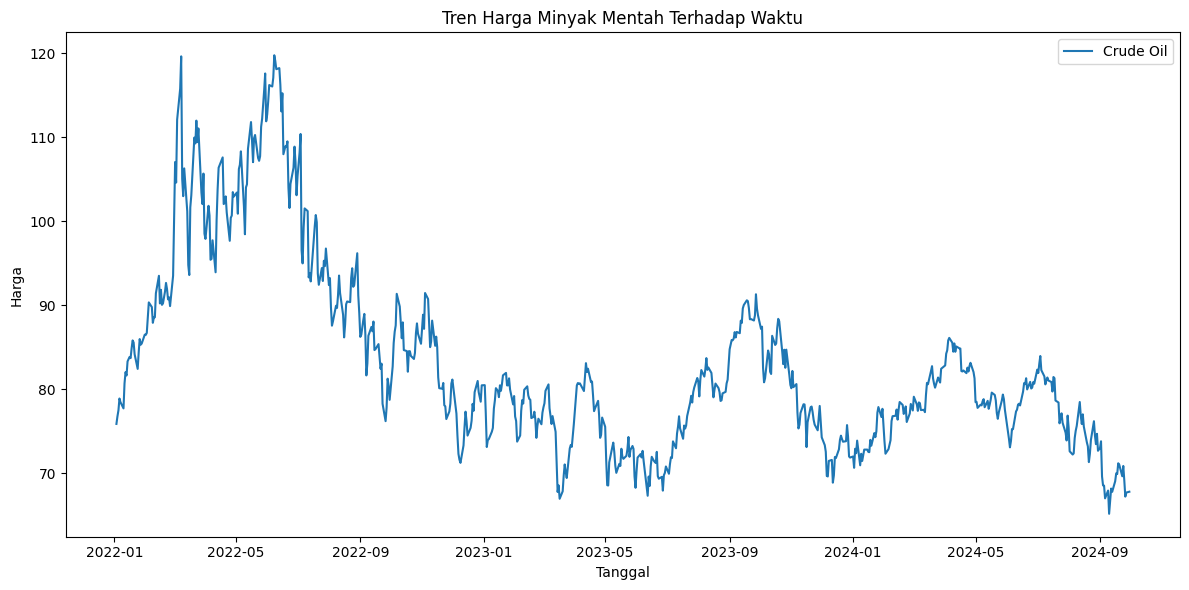

In [21]:
# Plot
plt.figure(figsize=(12, 6))

# plot crude oil
plt.plot(dataset_crudeOil['date'], dataset_crudeOil['price'], label='Crude Oil')

# Tambahkan judul dan label Crude Oil
plt.title('Tren Harga Minyak Mentah Terhadap Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga')

# Tambahkan legenda
plt.legend()

# Tampilkan grid (opsional)
plt.grid(False)

# Atur tata letak agar label tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

## Analisis Eksplorasi Data

Ada beberapa yang perlu diekplorasi terkait Crude Oil ini.

- pada plot meskipun date tidak `ascending` plot untungnya tetap dalam keadaan baik. Tapi, pada forecasting `date` harus dalam keadaan `ascending`
- lebih lanjut terkait plot

In [22]:
# sort dahulu sesuai date agar ascending
dataset_crudeOil.sort_values(by='date', inplace=True)

pada bulan oktober 2022, sebut saja 2022-10-01. Harga Crude Oil memiliki perubahan variansi. Sebelum itu harga per kilang nya sangat tinggi, tapi setelah oktober harga mulai rendah. Namun, itu hanya bertahan sampai juli 2023, setelahnya tinggi kembali sampai desember 2023. Meskipun tidak setinggi di 2022. Setelah januari 2023 sampai september 2024, variansi cukup bisa dibilang konstan.

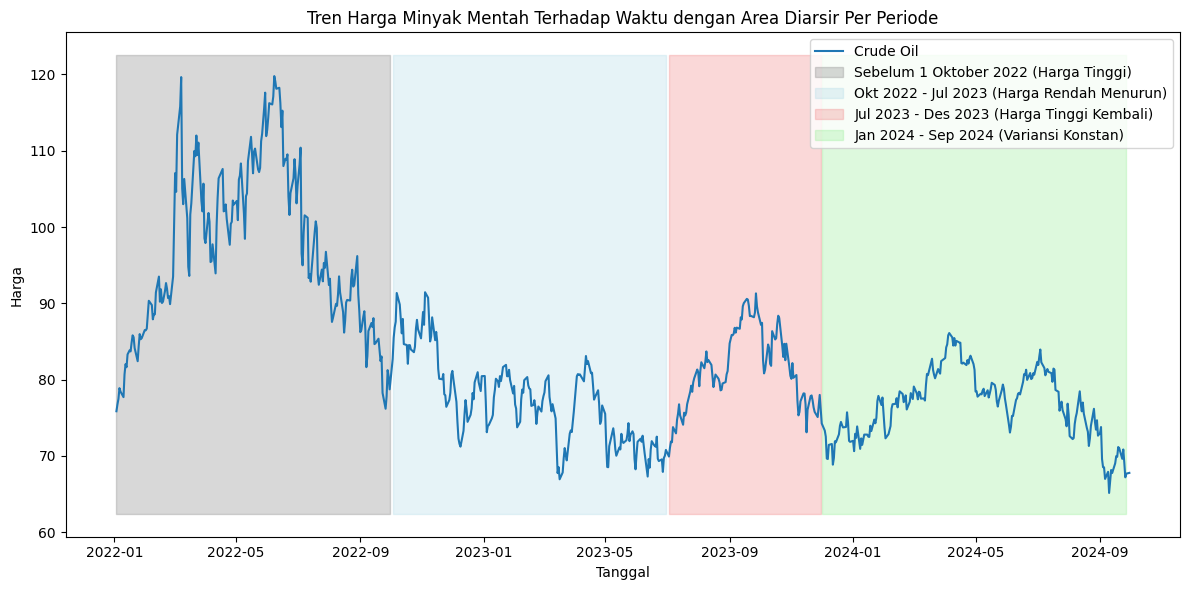

In [37]:
# Plot dengan beberapa area yang diarsir
plt.figure(figsize=(12, 6))

# Plot harga Crude Oil
plt.plot(dataset_crudeOil['date'], dataset_crudeOil['price'], label='Crude Oil')

# Definisikan tanggal batas untuk setiap periode
date_boundary_1 = pd.to_datetime('2022-10-01')
date_boundary_2 = pd.to_datetime('2023-07-01')
date_boundary_3 = pd.to_datetime('2023-12-01')
date_boundary_4 = pd.to_datetime('2024-09-30') # Asumsi batas akhir data

# Dapatkan batas sumbu y
y_min, y_max = plt.gca().get_ylim()

# Arsir area untuk setiap periode
plt.fill_between(dataset_crudeOil['date'], y_min, y_max, where=(dataset_crudeOil['date'] < date_boundary_1), color='gray', alpha=0.3, label='Sebelum 1 Oktober 2022 (Harga Tinggi)')
plt.fill_between(dataset_crudeOil['date'], y_min, y_max, where=((dataset_crudeOil['date'] >= date_boundary_1) & (dataset_crudeOil['date'] < date_boundary_2)), color='lightblue', alpha=0.3, label='Okt 2022 - Jul 2023 (Harga Rendah Menurun)')
plt.fill_between(dataset_crudeOil['date'], y_min, y_max, where=((dataset_crudeOil['date'] >= date_boundary_2) & (dataset_crudeOil['date'] < date_boundary_3)), color='lightcoral', alpha=0.3, label='Jul 2023 - Des 2023 (Harga Tinggi Kembali)')
plt.fill_between(dataset_crudeOil['date'], y_min, y_max, where=((dataset_crudeOil['date'] >= date_boundary_3) & (dataset_crudeOil['date'] < date_boundary_4)), color='lightgreen', alpha=0.3, label='Jan 2024 - Sep 2024 (Variansi Konstan)')


# Tambahkan judul dan label
plt.title('Tren Harga Minyak Mentah Terhadap Waktu dengan Area Diarsir Per Periode')
plt.xlabel('Tanggal')
plt.ylabel('Harga')

# Tambahkan legenda
plt.legend(loc='upper right')

# Tampilkan grid (opsional)
plt.grid(False)

# Atur tata letak agar label tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

dengan melihat perubahan harga harian kita bisa melihat gradiennya

Persamaan garis regresi: Harga = -0.0245 * (Jumlah Hari Sejak 2022-01-03) + 95.2568
Gradien garis regresi: -0.0245


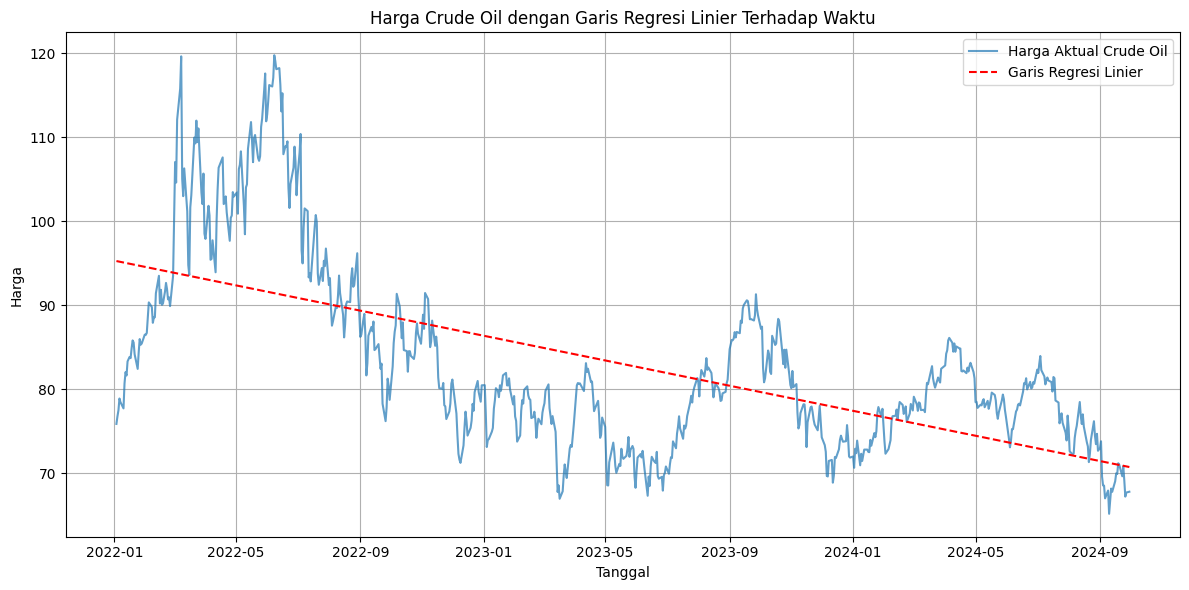

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Mengubah Tanggal Menjadi Variabel Numerik
# Definisikan tanggal awal sebagai titik nol
start_date = dataset_crudeOil['date'].min()
# Hitung jumlah hari sejak tanggal awal
dataset_crudeOil['days_since_start'] = (dataset_crudeOil['date'] - start_date).dt.days

# 2. Melakukan Regresi Linier
# Siapkan data untuk regresi
# Variabel independen (X) harus dalam bentuk array 2D
X = dataset_crudeOil[['days_since_start']].values
# Variabel dependen (y)
y = dataset_crudeOil['price'].values

# Buat model regresi linier
model = LinearRegression()

# Latih model
model.fit(X, y)

# Prediksi harga menggunakan model regresi
predictions = model.predict(X)

# Gradien (slope) dari garis regresi
slope = model.coef_[0]
intercept = model.intercept_

print(f"Persamaan garis regresi: Harga = {slope:.4f} * (Jumlah Hari Sejak {start_date.date()}) + {intercept:.4f}")
print(f"Gradien garis regresi: {slope:.4f}")

# 3. Membuat Plot
plt.figure(figsize=(12, 6))

# Plot harga aktual
plt.plot(dataset_crudeOil['date'], dataset_crudeOil['price'], label='Harga Aktual Crude Oil', alpha=0.7)

# Plot garis regresi
plt.plot(dataset_crudeOil['date'], predictions, color='red', linestyle='--', label='Garis Regresi Linier')

# Tambahkan judul dan label
plt.title('Harga Crude Oil dengan Garis Regresi Linier Terhadap Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga')

# Tambahkan legenda
plt.legend()

# Tampilkan grid (opsional)
plt.grid(True)

# Atur tata letak agar label tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()

Periode: Sebelum 1 Okt 2022 (Harga Tinggi) - Gradien Regresi: -0.0014
Periode: Okt 2022 - Jul 2023 (Harga Rendah Menurun) - Gradien Regresi: -0.0545
Periode: Jul 2023 - Des 2023 (Harga Tinggi Kembali) - Gradien Regresi: 0.0221
Periode: Jan 2024 - Sep 2024 (Variansi Konstan) - Gradien Regresi: -0.0029


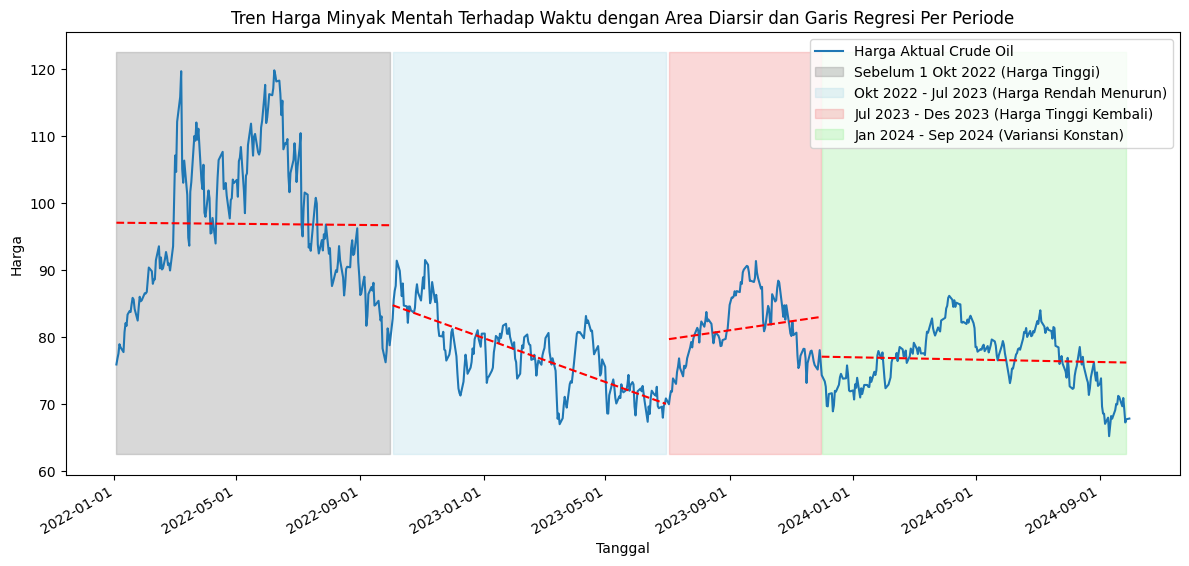

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

# Definisikan tanggal batas untuk setiap periode
date_boundary_1 = pd.to_datetime('2022-10-01')
date_boundary_2 = pd.to_datetime('2023-07-01')
date_boundary_3 = pd.to_datetime('2023-12-01')
date_boundary_4 = pd.to_datetime('2024-09-30') # Asumsi batas akhir data

# Buat daftar periode dan labelnya
periods = [
    (dataset_crudeOil['date'].min(), date_boundary_1, 'gray', 'Sebelum 1 Okt 2022 (Harga Tinggi)'),
    (date_boundary_1, date_boundary_2, 'lightblue', 'Okt 2022 - Jul 2023 (Harga Rendah Menurun)'),
    (date_boundary_2, date_boundary_3, 'lightcoral', 'Jul 2023 - Des 2023 (Harga Tinggi Kembali)'),
    (date_boundary_3, date_boundary_4, 'lightgreen', 'Jan 2024 - Sep 2024 (Variansi Konstan)')
]

# Plot dengan area diarsir dan garis regresi per periode
plt.figure(figsize=(12, 6))

# Plot harga Crude Oil
plt.plot(dataset_crudeOil['date'], dataset_crudeOil['price'], label='Harga Aktual Crude Oil')

# Dapatkan batas sumbu y
y_min, y_max = plt.gca().get_ylim()

# Loop melalui setiap periode untuk mengarsir dan menghitung regresi
for start_date, end_date, color, label in periods:
    # Filter data untuk periode saat ini
    period_data = dataset_crudeOil[(dataset_crudeOil['date'] >= start_date) & (dataset_crudeOil['date'] < end_date)].copy()

    if not period_data.empty:
        # Arsir area untuk periode saat ini
        plt.fill_between(period_data['date'], y_min, y_max, color=color, alpha=0.3, label=label)

        # Hitung hari sejak awal periode ini
        period_data['days_since_period_start'] = (period_data['date'] - period_data['date'].min()).dt.days

        # Siapkan data untuk regresi linier
        X_period = period_data[['days_since_period_start']].values
        y_period = period_data['price'].values

        # Lakukan regresi linier
        model_period = LinearRegression()
        model_period.fit(X_period, y_period)

        # Prediksi harga untuk periode ini
        predictions_period = model_period.predict(X_period)

        # Plot garis regresi untuk periode ini
        plt.plot(period_data['date'], predictions_period, color='red', linestyle='--') # Gunakan warna yang berbeda atau gaya garis untuk membedakan

        # Opsional: Cetak gradien untuk setiap periode
        slope_period = model_period.coef_[0]
        print(f"Periode: {label} - Gradien Regresi: {slope_period:.4f}")


# Tambahkan judul dan label
plt.title('Tren Harga Minyak Mentah Terhadap Waktu dengan Area Diarsir dan Garis Regresi Per Periode')
plt.xlabel('Tanggal')
plt.ylabel('Harga')

# Tambahkan legenda
plt.legend(loc='upper right')

# Atur tata letak agar label tidak tumpang tindih
plt.tight_layout()

# Pastikan label sumbu x menampilkan tanggal dengan benar
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate() # Otomatis mengatur format tanggal

# Tampilkan plot
plt.show()

sepertinya menarik, kalau kita lihat daripada batas pertama pada 1 oktober 2022, tapi, 1 juni 2022.

Periode: Sebelum 5 Juni 2022 (Periode Baru 1) - Gradien Regresi: 0.2078
Periode: Juni 2022 - Jul 2023 (Periode Baru 2) - Gradien Regresi: -0.0819
Periode: Jul 2023 - Des 2023 (Periode Baru 3) - Gradien Regresi: 0.0221
Periode: Jan 2024 - Sep 2024 (Periode Baru 4) - Gradien Regresi: -0.0029


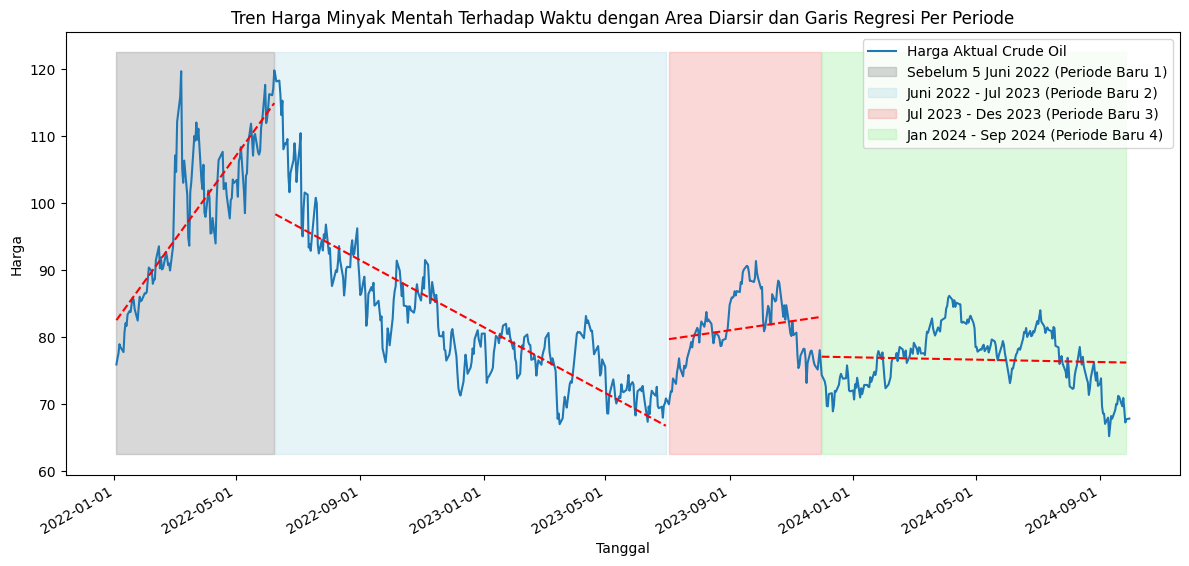

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

# Definisikan tanggal batas untuk setiap periode
date_boundary_1 = pd.to_datetime('2022-06-9')
date_boundary_2 = pd.to_datetime('2023-07-01')
date_boundary_3 = pd.to_datetime('2023-12-01')
date_boundary_4 = pd.to_datetime('2024-09-30')

# Buat daftar periode dan labelnya
periods = [
    (dataset_crudeOil['date'].min(), date_boundary_1, 'gray', 'Sebelum 5 Juni 2022 (Periode Baru 1)'), # Sesuaikan label
    (date_boundary_1, date_boundary_2, 'lightblue', 'Juni 2022 - Jul 2023 (Periode Baru 2)'), # Sesuaikan label
    (date_boundary_2, date_boundary_3, 'lightcoral', 'Jul 2023 - Des 2023 (Periode Baru 3)'), # Tetap sama
    (date_boundary_3, date_boundary_4, 'lightgreen', 'Jan 2024 - Sep 2024 (Periode Baru 4)') # Tetap sama
]

# Plot dengan area diarsir dan garis regresi per periode
plt.figure(figsize=(12, 6))

# Plot harga Crude Oil
plt.plot(dataset_crudeOil['date'], dataset_crudeOil['price'], label='Harga Aktual Crude Oil')

# Dapatkan batas sumbu y
y_min, y_max = plt.gca().get_ylim()

# Loop melalui setiap periode untuk mengarsir dan menghitung regresi
for start_date, end_date, color, label in periods:
    # Filter data untuk periode saat ini
    period_data = dataset_crudeOil[(dataset_crudeOil['date'] >= start_date) & (dataset_crudeOil['date'] < end_date)].copy()

    if not period_data.empty:
        # Arsir area untuk periode saat ini
        plt.fill_between(period_data['date'], y_min, y_max, where=((period_data['date'] >= start_date) & (period_data['date'] < end_date)), color=color, alpha=0.3, label=label)
        # Hitung hari sejak awal periode ini
        period_data['days_since_period_start'] = (period_data['date'] - period_data['date'].min()).dt.days

        # Siapkan data untuk regresi linier
        X_period = period_data[['days_since_period_start']].values
        y_period = period_data['price'].values

        # Lakukan regresi linier
        model_period = LinearRegression()
        model_period.fit(X_period, y_period)

        # Prediksi harga untuk periode ini
        predictions_period = model_period.predict(X_period)

        # Plot garis regresi untuk periode ini
        plt.plot(period_data['date'], predictions_period, color='red', linestyle='--') # Gunakan warna yang berbeda atau gaya garis untuk membedakan

        # Opsional: Cetak gradien untuk setiap periode
        slope_period = model_period.coef_[0]
        print(f"Periode: {label} - Gradien Regresi: {slope_period:.4f}")


# Tambahkan judul dan label
plt.title('Tren Harga Minyak Mentah Terhadap Waktu dengan Area Diarsir dan Garis Regresi Per Periode')
plt.xlabel('Tanggal')
plt.ylabel('Harga')

# Tambahkan legenda dan atur posisinya
plt.legend(loc='upper right')

# Atur tata letak agar label tidak tumpang tindih
plt.tight_layout()

# Pastikan label sumbu x menampilkan tanggal dengan benar
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate() # Otomatis mengatur format tanggal

# Tampilkan plot
plt.show()